# Importando libs

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt 
plt.rc('figure', figsize = (14,6))
import json

#Uma configução para ocultar uns SettingWithCopyWarning
pd.set_option('mode.chained_assignment', None)

# Criando funções para o tratamento

Função para separação de siglas e criação de tabela legenda.

In [2]:
def tratamento(dataset, leg_dataset):
    lista1 = []
    lista2 = []
    for i in dataset.columns:     #Faz a separação do Nome e Sigla da tabela
        try:
            lista1.append(i.split('-', 1)[0])
            lista2.append(i.split('-', 1)[1])
        except IndexError:
            lista1.remove(i.split('-', 1)[0])      

    lista3 = [] 
    for i in dataset.columns:    #Faz o reajuste do nome das colunas só com as siglas
        lista3.append(i.split('-', 1)[0])

    dataset.columns = lista3
    dataset
    
    dataset.drop(dataset.index[-1], inplace = True)

    leg_dataset['sigla'] = lista1 #Cria um data Set com a sigla e o seu significado para busca
    leg_dataset['siginificado'] = lista2
    leg_dataset
    return dataset, leg_dataset

Função para conversão de dados das colunas para valor float.

In [3]:
# função para tirar virgula dos valores
def tirando_virgula(dataset, column):
    for i in range(dataset.shape[0]): 
        dataset.loc[i, column] = dataset.loc[i, column].replace(',', '.')

    dataset = dataset.astype({column : 'float'})
    return dataset

# Dados dos orgãos gestores 

In [4]:
#Importando dados
OrgaoGestorMun = pd.read_csv('OrgaoGestorMun.csv', sep = ';', encoding = 'utf-8')

#Criando dataframe para a legenda das colunas
leg_OrgaoGestorMun = pd.DataFrame()

In [5]:
#Tratamento dos dados
OrgaoGestorMun, leg_OrgaoGestorMun = tratamento(OrgaoGestorMun, leg_OrgaoGestorMun)

In [6]:
OrgaoGestorMun

,Código do Município,Município,Estado,Ano de Referência,Código do Prestador,Prestador,Sigla do Prestador,Natureza Jurídica,POP_TOT,POP_URB,CO008,CO111,CO115,CO119,CS001,CS009
0,210043,Alto Alegre do Maranhão,MA,2019,21004340,Prefeitura Municipal de Alto Alegre do Maranhão,PMAAM,Administração pública direta,27053,21307,Não,NaN,NaN,2000,Não,NaN
1,210047,Alto Alegre do Pindaré,MA,2019,21004740,Prefeitura Municipal de Alto Alegre do Pindaré,PMAAP,Autarquia,31919,10102,Não,NaN,NaN,8018,Não,NaN
2,210055,Amapá do Maranhão,MA,2019,21005540,Prefeitura Municipal de Amapá do Maranhão,PMAM,Administração pública direta,6962,5241,Não,NaN,NaN,1400,Não,NaN
3,210080,Anapurus,MA,2019,21008040,Secretaria de Meio-Ambiente,SEMMAM,Sociedade de economia mista com administração ...,15732,8086,Não,NaN,NaN,2405,Não,NaN
4,210083,Apicum-Açu,MA,2019,21008340,Secretaria Municipal de Saúde,SEMUS,Administração pública direta,17239,10558,Não,NaN,NaN,2180,Não,NaN
5,210100,Arari,MA,2019,21010040,PREFEITURA MUNICIPAL DE ARARI,PMA,Administração pública direta,29848,18318,Não,NaN,NaN,6500,Não,NaN
6,210135,Bacurituba,MA,2019,21013540,Prefeitura Municipal de Bacurituba,PMBAC,Administração pública direta,5644,1518,Não,NaN,NaN,95,Não,NaN
7,210140,Balsas,MA,2019,21014040,SECRETARIA DE INFRAESTRUTURA,SINFRA,Administração pública direta,94887,82667,Sim,NaN,NaN,21104,Não,NaN
8,210180,Benedito Leite,MA,2019,21018040,Prefeitura Municipal de Benedito Leite,PMBL,Administração pública direta,5632,2897,Não,NaN,NaN,108,Não,NaN
9,210190,Bequimão,MA,2019,21019040,Prefeitura Municipal Bequimão,PMB,Administração pública direta,21280,6910,Não,1825,1200,3025,Não,NaN


In [7]:
OrgaoGestorMun.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Código do Município  60 non-null     object
 1   Município            60 non-null     object
 2   Estado               60 non-null     object
 3   Ano de Referência    60 non-null     object
 4   Código do Prestador  60 non-null     object
 5   Prestador            60 non-null     object
 6   Sigla do Prestador   60 non-null     object
 7   Natureza Jurídica    60 non-null     object
 8   POP_TOT              60 non-null     int64 
 9   POP_URB              60 non-null     int64 
 10  CO008                55 non-null     object
 11  CO111                8 non-null      object
 12  CO115                8 non-null      object
 13  CO119                60 non-null     object
 14  CS001                60 non-null     object
 15  CS009                6 non-null      object
dtypes: int64(2

In [9]:
print('Legenda do título de cada coluna e quais as informações nelas.')
pd.set_option('max_colwidth', 100)
leg_OrgaoGestorMun

Legenda do titulo de cada coluna e quais as informações nelas.


,sigla,siginificado
0,POP_TOT,População total do município (Fonte: IBGE):
1,POP_URB,População urbana do município (Fonte: IBGE)
2,CO008,Há serviço de coleta noturna no município?
3,CO111,Quantidade total de RDO coletada por todos os agentes
4,CO115,Quantidade total de RPU coletada por todos os agentes executores
5,CO119,Quantidade total de RDO e RPU coletada por todos os agentes
6,CS001,Existe coleta seletiva no município?
7,CS009,Quantidade total de materiais recicláveis recuperados


In [10]:
# Convertendo a coluna CO119 - Quantidade total de RDO e RPU coletada por todos os agentes.
OrgaoGestorMun = tirando_virgula(OrgaoGestorMun, 'CO119 ')

## Quantidade total de toneladas/ano  de RDO e RPU coletadas no Maranhão

In [11]:
# Quantidade total de toneladas/ano  de RDO e RPU coletadas no maranhão
n1 = OrgaoGestorMun['CO119 '].sum()
print(f'Quantidade de tonalenas coletadados no ano de 2019  no Maranhão: {n1} ton')

Quantidade de tonalenas coletadados no ano de 2019  no Maranhão: 1021742.5 ton


# Existe coleta seletiva no município?

In [12]:
# fazendo a contagem e transformando em um dataframe
coleta_seletiva = pd.DataFrame(OrgaoGestorMun['CS001 '].value_counts())

#Alterando o nome das colunas
coleta_seletiva = coleta_seletiva.reset_index()
coleta_seletiva.columns = ['coleta_seletiva', 'dados']
coleta_seletiva

,coleta_seletiva,dados
0,Não,57
1,Sim,3


Text(0.5, 1.0, 'Quantidade de Cidades que fazem coleta seletiva')

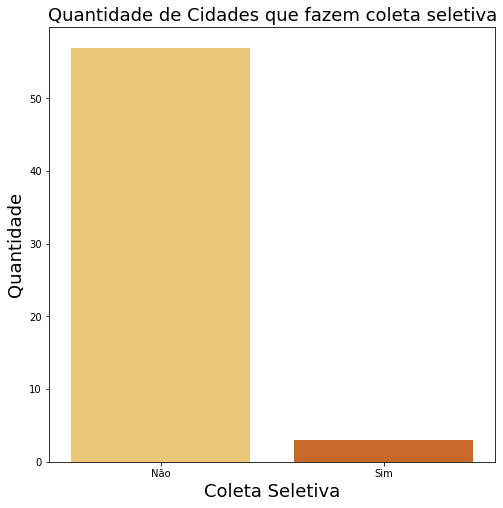

In [17]:
img_coleta_seletiva = sns.barplot(x = 'coleta_seletiva', y='dados', data =coleta_seletiva, palette="YlOrBr")
img_coleta_seletiva.figure.set_size_inches(8, 8)
plt.xlabel("Coleta Seletiva", fontsize=18)
plt.ylabel("Quantidade", fontsize=18)
plt.title('Quantidade de Cidades que fazem coleta seletiva', fontsize=18)

In [18]:
#Exportando dados
coleta_seletiva.to_csv("coleta_seletiva.csv", index = False, sep = ";")

#exportando para json
coleta_seletiva.to_json("coleta_seletiva_split.json", orient="split", index = False)

coleta_seletiva.to_html("coleta_seletiva_index.html", index = False)

#salvando img 
img_coleta_seletiva.figure.savefig("coleta_seletiva.png")


In [19]:
n = coleta_seletiva.loc[1, 'dados']

In [25]:
print(f'Quem são os {n} municípios que fazem coleta seletiva?')
municipios_coleta_nome = OrgaoGestorMun.loc[OrgaoGestorMun['CS001 ']=='Sim', ['Município']]
municipios_coleta_nome

Quem são os 3 municípios que fazem coleta seletiva?


,Município
25,Imperatriz
47,Santa Luzia
52,São Luís


In [23]:
#Exportando dados
municipios_coleta_nome.to_csv("municipios_coleta_nome.csv", index = False, sep = ";")

#exportando para json
municipios_coleta_nome.to_json("municipios_coleta_nome.json", orient="split", index = False)

municipios_coleta_nome.to_html("municipios_coleta_nome.html", index = False)


## Quantidade de total de materiais recicláveis recuperados

In [26]:
# Separação das cidades que tiveram algum material reciclavél recuperado
quantidade_recilcavel = OrgaoGestorMun[['CS009 ', 'Município']]
quantidade_recilcavel.dropna(inplace = True)

#Alterando nome das colunas
quantidade_recilcavel = quantidade_recilcavel.reset_index()
quantidade_recilcavel.drop('index', 1, inplace = True)
quantidade_recilcavel.columns = ['quantidade', 'Município']
quantidade_recilcavel

C:\Users\RAILSO~1\AppData\Local\Temp/ipykernel_10960/3854592851.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  quantidade_recilcavel.drop('index', 1, inplace = True)


,quantidade,Município
0,"23,2",Cachoeira Grande
1,463,Imperatriz
2,"120,3",Santa Luzia
3,1000,São João dos Patos
4,"24323,7",São Luís
5,104,Trizidela do Vale


In [27]:
#Exportando dados
quantidade_recilcavel.to_csv("quantidade_recilcavel.csv", index = False, sep = ";")

#exportando para json
quantidade_recilcavel.to_json("quantidade_recilcavel_split.json", orient="split", index = False)

quantidade_recilcavel.to_html("quantidade_recilcavel_index.html", index = False)


In [28]:
mun = len(quantidade_recilcavel)
muns = len(OrgaoGestorMun)
print(f'Assim, só um total de {mun} municípios, de {muns} que participaram da pesquisa, fazem reciclagem.')

Assim, só um total de 6 municípios, de 60 que participaram da pesquisa, fazem reciclagem.


In [29]:
# Tratamento dos dados.
quantidade_recilcavel = tirando_virgula(quantidade_recilcavel, 'quantidade')

## Quantidade de lixo reciclado recuperado

In [30]:
n2 = quantidade_recilcavel['quantidade'].sum()
print(f'De todo o lixo coletado só {n2} ton é reciclado.')

De todo o lixo coletado só 26034.2 ton é reciclado.


In [31]:
n3 = n2/n1
print(f'Logo só {(n3*100).round(2)}% do lixo é reciclado no Maranhão.')

Logo só 2.55% do lixo é reciclado no Maranhão.


# Dados de fluxo de residuos

In [32]:
#Importando dados
FluxoResiduos = pd.read_csv('FluxoResiduos.csv', sep = ';', encoding = 'utf-8')

#Criando dataframe para a legenda das colunas
leg_FluxoResiduos = pd.DataFrame()

In [33]:
#Tratamento dos dados
FluxoResiduos, leg_FluxoResiduos = tratamento(FluxoResiduos, leg_FluxoResiduos)

In [34]:
FluxoResiduos

,Código do Município,Município,Estado,Ano de Referência,Unidades,Nome da Unidade,UP007,UP008,UP009,UP010,UP011,UP025,UP067,UP080,UP003,UP004
0,210043,Alto Alegre do Maranhão,MA,2019,2100434000,LIXÃO MUNICIPAL DE ALTO ALEGRE DO MARANHÃO,2000,0,NaN,2000,0.0,Alto Alegre do Maranhão/MA,1000,5000,Lixão,Empresa privada
1,210047,Alto Alegre do Pindaré,MA,2019,3901,Lixão,8000,0,NaN,0,0.0,Alto Alegre do Pindaré/MA,0,8000,Lixão,Prefeitura ou SLU
2,210055,Amapá do Maranhão,MA,2019,7508,LIXÃO,1280,0,NaN,0,0.0,Amapá do Maranhão/MA,0,1280,Lixão,Prefeitura ou SLU
3,210080,Anapurus,MA,2019,2480,Lixão Municipal,2405,0,NaN,0,0.0,Anapurus/MA,0,2405,Lixão,Prefeitura ou SLU
4,210083,Apicum-Açu,MA,2019,2315,Lixão com Coleta Seletiva,2180,0,NaN,0,0.0,Apicum-Açu/MA,0,2180,Lixão,Prefeitura ou SLU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,211220,Timon,MA,2019,2112204000,Lixão,100000,0,NaN,0,0.0,Timon/MA,0,100000,Lixão,Prefeitura ou SLU
60,211220,Timon,MA,2019,2112204001,Fabrica de Reciclagem,700,NaN,NaN,NaN,NaN,Timon/MA,NaN,700,Unidade de triagem (galpão ou usina),Prefeitura ou SLU
61,211223,Trizidela do Vale,MA,2019,3395,lixão,3456,0,NaN,0,0.0,Trizidela do Vale/MA,0,3456,Aterro controlado,Prefeitura ou SLU
62,211270,Vargem Grande,MA,2019,8923,LIXÃO DE VARGEM GRANDE,7776,0,NaN,0,0.0,Vargem Grande/MA,0,7776,Lixão,Prefeitura ou SLU


In [35]:
leg_FluxoResiduos

,sigla,siginificado
0,UP007,Quantidade de RDO e RPU recebida na unidade de processamento
1,UP008,Quantidade de RSS recebida na unidade de processamento
2,UP009,Quantidade de RIN recebida na unidade de processamento
3,UP010,Quantidade de RCC recebida na unidade de processamento
4,UP011,Quantidade de outros tipos de resíduos recebida na unidade de processamento
5,UP025,Municípios de origem dos resíduos
6,UP067,Quantidade de RPO recebida na unidade de processamento
7,UP080,Quantidade total de resíduos recebida na unidade de processamento por cada município
8,UP003,Tipo de unidade
9,UP004,Operador da unidade


In [36]:
FluxoResiduos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 0 to 63
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Código do Município  64 non-null     object 
 1   Município            64 non-null     object 
 2   Estado               64 non-null     object 
 3   Ano de Referência    64 non-null     object 
 4   Unidades             64 non-null     object 
 5   Nome da Unidade      64 non-null     object 
 6   UP007                63 non-null     object 
 7   UP008                59 non-null     object 
 8   UP009                0 non-null      float64
 9   UP010                59 non-null     object 
 10  UP011                58 non-null     float64
 11  UP025                64 non-null     object 
 12  UP067                58 non-null     object 
 13  UP080                64 non-null     object 
 14  UP003                64 non-null     object 
 15  UP004                64 non-null     objec

## Quantidade total de resíduos recebida por tipo d unidade de processamento no maranhão

In [59]:
# Separando dados
dados_lixo = FluxoResiduos[['UP003 ', 'UP080 ' ]]
dados_lixo

,UP003,UP080
0,Lixão,5000
1,Lixão,8000
2,Lixão,1280
3,Lixão,2405
4,Lixão,2180
...,...,...
59,Lixão,100000
60,Unidade de triagem (galpão ou usina),700
61,Aterro controlado,3456
62,Lixão,7776


In [60]:
# Tratamento dos dados.
dados_lixo = tirando_virgula(dados_lixo, 'UP080 ')

In [40]:
dados_lixo

,UP003,UP080
0,Lixão,5000.0
1,Lixão,8000.0
2,Lixão,1280.0
3,Lixão,2405.0
4,Lixão,2180.0
...,...,...
59,Lixão,100000.0
60,Unidade de triagem (galpão ou usina),700.0
61,Aterro controlado,3456.0
62,Lixão,7776.0


In [61]:
Quantidade_lixo = dados_lixo.groupby(['UP003 '])[['UP080 ']].sum()
Quantidade_lixo = Quantidade_lixo.reset_index()
Quantidade_lixo.columns = ['tipo', 'quantidade']
Quantidade_lixo

,tipo,quantidade
0,Aterro controlado,14446.0
1,Aterro sanitário,441195.2
2,Lixão,497131.2
3,Unidade de triagem (galpão ou usina),5528.7
4,Vala especifica de RSS,2.0


Text(0.5, 1.0, 'Quantidade de Lixo por Tipo de Unidade no Maranhão')

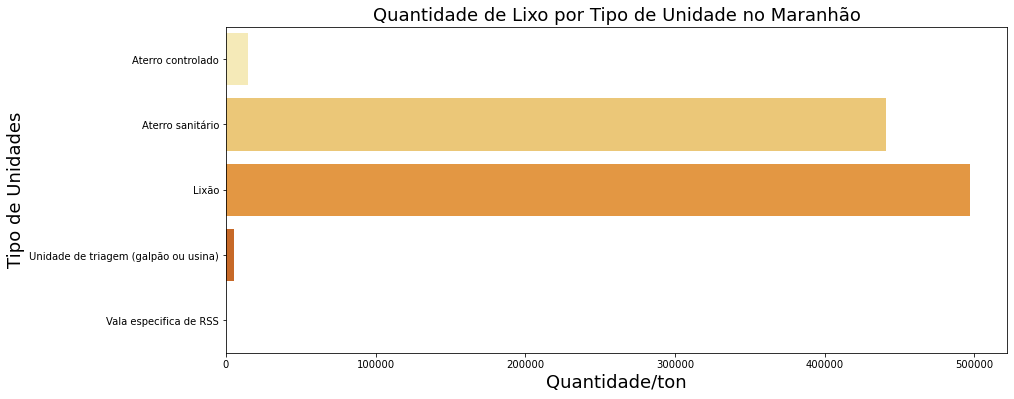

In [62]:
Quantidade_lixo_img = sns.barplot(x = 'quantidade', y = 'tipo', data = Quantidade_lixo, orient='h', palette="YlOrBr")
plt.ylabel("Tipo de Unidades", fontsize=18)
plt.xlabel("Quantidade/ton", fontsize=18)
plt.title('Quantidade de Lixo por Tipo de Unidade no Maranhão', fontsize=18)

In [63]:
#Exportando dados
Quantidade_lixo.to_csv("Quantidade_lixo.csv", index = False, sep = ";")

#exportando para json
Quantidade_lixo.to_json("Quantidade_lixo_split.json", orient="split", index = False)

Quantidade_lixo.to_html("Quantidade_lixo_index.html", index = False)

#salvando img 
Quantidade_lixo_img.figure.savefig("Quantidade_lixo.png")


## E onde está o lixo do Maranhão?

In [64]:
p = Quantidade_lixo['quantidade'].sum()

v = Quantidade_lixo.iloc[2, 1]

lixo = (v/p)

print(f'E {(lixo*100).round(2)}% do lixo do maranhão ainda é depositado de maneira irregular.')

E 51.88% do lixo do maranhão ainda é depositado de maneira irregular.


# Dados de unidade de processamento

In [65]:
#Importando dados
UnidadesProcessamento = pd.read_csv('UnidadesProcessamento.csv', sep = ';', encoding = 'utf-8')

#Criando dataframe para a legenda das colunas
leg_UnidadesProcessamento = pd.DataFrame()

In [66]:
#Tratamento dos dados
UnidadesProcessamento, leg_UnidadesProcessamento = tratamento(UnidadesProcessamento, leg_UnidadesProcessamento)

In [67]:
UnidadesProcessamento

,Código do Município,Município,Estado,Ano de Referência,Unidades,Nome da Unidade,Tipo da Unidade,Operador,UP012,UP027,UP030,UP031,UP032,UP033,UP050,UP052,UP066
0,210043,Alto Alegre do Maranhão,MA,2019,2100434000,LIXÃO MUNICIPAL DE ALTO ALEGRE DO MARANHÃO,Lixão,Empresa privada,Não,Sim,Semanal,Não,Não,Não,Outro tipo,Não,2010.0
1,210047,Alto Alegre do Pindaré,MA,2019,3901,Lixão,Lixão,Prefeitura ou SLU,Não,Não,Semanal,Não,Não,Não,Não existe,Não,2013.0
2,210055,Amapá do Maranhão,MA,2019,7508,LIXÃO,Lixão,Prefeitura ou SLU,Não,Não,Não é realizado,Não,Não,Não,Não existe,Não,2016.0
3,210080,Anapurus,MA,2019,2480,Lixão Municipal,Lixão,Prefeitura ou SLU,Não,NaN,Semanal,NaN,NaN,NaN,Não existe,NaN,2012.0
4,210083,Apicum-Açu,MA,2019,2315,Lixão com Coleta Seletiva,Lixão,Prefeitura ou SLU,Não,Não,Não é realizado,Não,Não,Não,Prévia,Não,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,211220,Timon,MA,2019,2112204000,Lixão,Lixão,Prefeitura ou SLU,Não,NaN,Diária,NaN,NaN,NaN,Outro tipo,NaN,2005.0
79,211223,Trizidela do Vale,MA,2019,1739,Aterro Sanitário,Aterro controlado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.0
80,211223,Trizidela do Vale,MA,2019,3395,lixão,Aterro controlado,Prefeitura ou SLU,Não,Sim,Quinzenal,Não,Não,Não,Não existe,Não,2013.0
81,211270,Vargem Grande,MA,2019,8923,LIXÃO DE VARGEM GRANDE,Lixão,Prefeitura ou SLU,Não,Não,Diária,Não,Não,Não,Não existe,Não,2017.0


In [68]:
leg_UnidadesProcessamento

,sigla,siginificado
0,UP012,Recebeu resíduos de outros municípios?
1,UP027,Existe cercamento da área?
2,UP030,Qual a frequência do recobrimento dos resíduos?
3,UP031,Existe drenagem de gases?
4,UP032,Existe sistema de drenagem do líquido percolado (chorume)?
5,UP033,Existe unidade de tratamento do líquido percolado (chorume) na area interna da unidade?
6,UP050,Tipo de licença ambiental emitida pelo órgão de controle ambiental
7,UP052,Existe algum tipo de aproveitamento dos gases drenados?
8,UP066,Ano de cadastro da unidade


In [69]:
UnidadesProcessamento.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 0 to 82
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Código do Município  83 non-null     object 
 1   Município            83 non-null     object 
 2   Estado               83 non-null     object 
 3   Ano de Referência    83 non-null     object 
 4   Unidades             83 non-null     object 
 5   Nome da Unidade      83 non-null     object 
 6   Tipo da Unidade      83 non-null     object 
 7   Operador             67 non-null     object 
 8   UP012                67 non-null     object 
 9   UP027                36 non-null     object 
 10  UP030                58 non-null     object 
 11  UP031                37 non-null     object 
 12  UP032                36 non-null     object 
 13  UP033                36 non-null     object 
 14  UP050                67 non-null     object 
 15  UP052                36 non-null     objec

## Existe drenagem de gases em alguma cidade do Maranhão?

In [70]:
dren_gas = UnidadesProcessamento.loc[UnidadesProcessamento['UP031 ']== 'Sim', 'Município'].count()
uni_total = len(UnidadesProcessamento)
print(f' Quantide de unidades de processamento que fazem drenagem de gases no Maranhão: {dren_gas}')
print(f'de um total de {uni_total} unidades de processamento espalhado por {muns} municípios.')

 Quantide de unidades de processamento que fazem drenagem de gases no Maranhão: 2
de um total de 83 unidades de processamento espalhado por 60 municípios.


## Quais?

In [71]:
UnidadesProcessamento.loc[UnidadesProcessamento['UP031 ']== 'Sim', ['Município', 'Nome da Unidade']]

,Município,Nome da Unidade
14,Cantanhede,Lixão Municipal
47,Nova Olinda do Maranhão,Aterro sanitario de nova olinda


In [72]:
municipios_drenagem_gas = UnidadesProcessamento.loc[UnidadesProcessamento['UP031 ']== 'Sim', ['Município', 'Nome da Unidade']]

In [73]:
#Exportando dados
municipios_drenagem_gas.to_csv("municipios_drenagem_gas.csv", index = False, sep = ";")

#exportando para json
municipios_drenagem_gas.to_json("municipios_drenagem_gas_split.json", orient="split", index = False)

municipios_drenagem_gas.to_html("municipios_drenagem_gas_index.html", index = False)


## Tratamento de dados faltantes

In [41]:
# todas que não possuem valores muito provavlemente não aproveitam os gaases e de certo não fazem drenagem.
UnidadesProcessamento['UP052 '].fillna('Não', inplace = True)

# todas que não possuem valores são lixão.
UnidadesProcessamento['UP050 '].fillna('Não existe', inplace = True)

# a maioria sem valor são lixão, logo não possuem drenagem
UnidadesProcessamento['UP031 '].fillna('Não', inplace = True)

## Drenagem de gás

In [74]:
# Separando dados 
drenagem_gas = pd.DataFrame(UnidadesProcessamento['UP031 '].value_counts())
drenagem_gas = drenagem_gas.reset_index()
drenagem_gas.columns = ['tipo', 'quantidade']
drenagem_gas

,tipo,quantidade
0,Não,35
1,Sim,2


Text(0.5, 1.0, 'Quantidade de Unidades que Fazem Drenagem dos Gases')

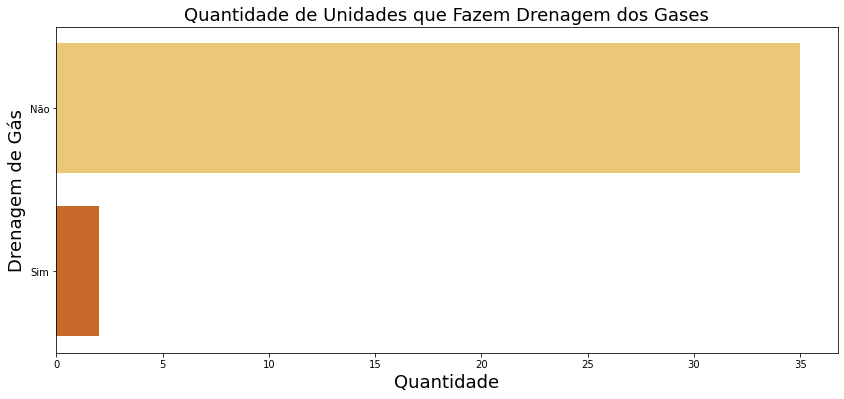

In [75]:
drenagem_gas_img = sns.barplot(x = 'quantidade', y = 'tipo', data = drenagem_gas, orient = "h", palette="YlOrBr")
plt.ylabel("Drenagem de Gás", fontsize=18)
plt.xlabel("Quantidade", fontsize=18)
plt.title('Quantidade de Unidades que Fazem Drenagem dos Gases', fontsize=18)

In [76]:
#Exportando dados
drenagem_gas.to_csv("drenagem_gas.csv", index = False, sep = ";")

#exportando para json
drenagem_gas.to_json("drenagem_gas_split.json", orient="split", index = False)

drenagem_gas.to_html("drenagem_gas_index.html", index = False)

#salvando img 
drenagem_gas_img.figure.savefig("drenagem_gas.png")

## Aproveitamento de gás

In [77]:
#Separação dos dados
aproveitamento_gas = pd.DataFrame(UnidadesProcessamento['UP052 '].value_counts())
aproveitamento_gas = aproveitamento_gas.reset_index()
aproveitamento_gas.columns = ['tipo', 'quantidade']
aproveitamento_gas

,tipo,quantidade
0,Não,35
1,Sim,1


In [78]:
UnidadesProcessamento.loc[UnidadesProcessamento['UP052 ']== 'Sim', ['Município', 'Nome da Unidade']]

,Município,Nome da Unidade
49,Pastos Bons,Lixão Controlado


In [79]:
municipios_aproveitamento_gas = UnidadesProcessamento.loc[UnidadesProcessamento['UP052 ']== 'Sim', ['Município', 'Nome da Unidade']]

municipios_aproveitamento_gas.to_csv("municipios_aproveitamento_gas.csv", index = False, sep = ";")

#exportando para json
municipios_aproveitamento_gas.to_json("municipios_aproveitamento_gas_split.json", orient="split", index = False)

municipios_aproveitamento_gas.to_html("municipios_aproveitamento_gas_index.html", index = False)

In [80]:
unica = UnidadesProcessamento.loc[49, 'Município']
print(f'Apenas a unidade de {unica} faz aproveitamento do gás.')

Apenas a unidade de Pastos Bons faz aproveitamento do gás.


Text(0.5, 1.0, 'Quantidade de Unidades que Fazem Aproveitamento dos Gases')

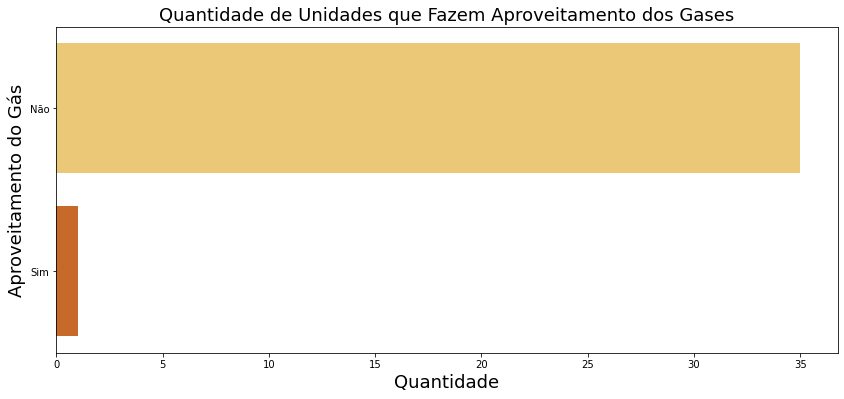

In [81]:
aproveitamento_gas_img = sns.barplot(x = 'quantidade', y = 'tipo', data = aproveitamento_gas, orient = "h", palette="YlOrBr")
plt.ylabel("Aproveitamento do Gás", fontsize=18)
plt.xlabel("Quantidade", fontsize=18)
plt.title('Quantidade de Unidades que Fazem Aproveitamento dos Gases', fontsize=18)

In [82]:
#Exportando dados
aproveitamento_gas.to_csv("aproveitamento_gas.csv", index = False, sep = ";")

#exportando para json
aproveitamento_gas.to_json("aproveitamento_gas_split.json", orient="split", index = False)

aproveitamento_gas.to_html("aproveitamento_gas_index.html", index = False)

#salvando img 
aproveitamento_gas_img.figure.savefig("aproveitamento_gas.png")

## Quantas unidades possuem licença ambiental

In [83]:
#separação dos dados
licenca_ambiental = pd.DataFrame(UnidadesProcessamento['UP050 '].value_counts())
licenca_ambiental = licenca_ambiental.reset_index()
licenca_ambiental.columns = ['tipo', 'quantidade']
licenca_ambiental

,tipo,quantidade
0,Não existe,49
1,Outro tipo,7
2,Operação,7
3,Prévia,2
4,Instalação,2


In [84]:
qua_licenca = licenca_ambiental.loc[0, 'quantidade']
print(f'{qua_licenca} de {uni_total} unidades de processamento de lixo não possuem liceça ambiental.')
por_unidade = qua_licenca/uni_total
print(f'{(por_unidade*100).round(2)}% das unidades dos {muns} municípios que participaram da pesquisa no Maranhão, estão sem licença ambiental.')

49 de 83 unidades de processamento de lixo não possuem liceça ambiental.
59.04% das unidades dos 60 municípios que participaram da pesquisa no Maranhão, estão sem licença ambiental.


Text(0.5, 1.0, 'Quantidade de Unidades por tipo de Licença')

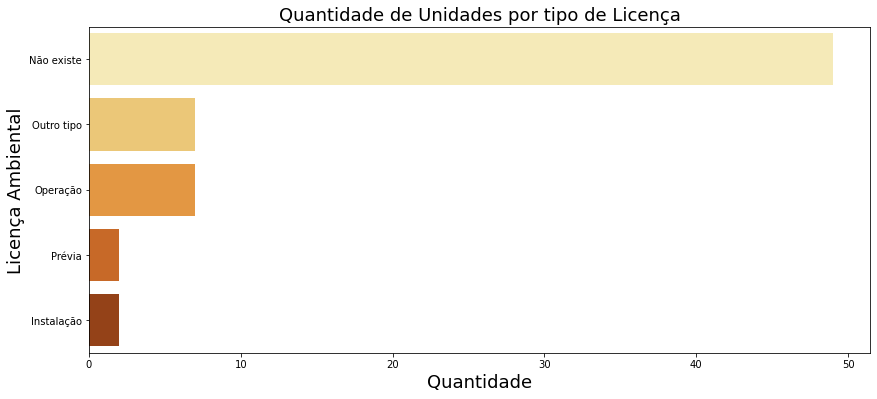

In [85]:
licenca_ambiental_img = sns.barplot(x = 'quantidade', y = 'tipo', data = licenca_ambiental, orient = "h", palette="YlOrBr")
plt.ylabel("Licença Ambiental", fontsize=18)
plt.xlabel("Quantidade", fontsize=18)
plt.title('Quantidade de Unidades por tipo de Licença', fontsize=18)

In [86]:
#Exportando dados
licenca_ambiental.to_csv("licenca_ambiental.csv", index = False, sep = ";")

#exportando para json
licenca_ambiental.to_json("licenca_ambiental_split.json", orient="split", index = False)

licenca_ambiental.to_html("licenca_ambiental_index.html", index = False)

#salvando img 
licenca_ambiental_img.figure.savefig("licenca_ambiental.png")

In [87]:
licenca_ambiental.to_json("licenca_ambiental_records.json", orient="records")
